<a href="https://colab.research.google.com/github/asrianda/latAlgoritma/blob/main/ALgo5_K_Means_Error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('Pengunjung_mall.csv')
df.columns = df.columns.str.replace(r'\W+', '_', regex=True)
df.head()

,IDPelanggan,Kelamin,Usia,Pendapatan_juta_Rp_,Rating_pengeluaran_1_100_
0,1,Laki,19,15,39
1,2,Laki,21,15,81
2,3,Perempuan,20,16,6
3,4,Perempuan,23,16,77
4,5,Perempuan,31,17,40


In [6]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le = LabelEncoder()
df['Kelamin'] = le.fit_transform(df['Kelamin'])
df.head()

,IDPelanggan,Kelamin,Usia,Pendapatan_juta_Rp_,Rating_pengeluaran_1_100_
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [7]:
data=['Kelamin','Usia','Pendapatan_juta_Rp_',
      'Rating_pengeluaran_1_100_']
scaler=StandardScaler()
scaler.fit(df[data])
df[data]=scaler.transform(df[data])
df.head()


,IDPelanggan,Kelamin,Usia,Pendapatan_juta_Rp_,Rating_pengeluaran_1_100_
0,1,-1.128152,-1.424569,-1.738999,-0.434801
1,2,-1.128152,-1.281035,-1.738999,1.195704
2,3,0.886405,-1.352802,-1.700830,-1.715913
3,4,0.886405,-1.137502,-1.700830,1.040418
4,5,0.886405,-0.563369,-1.662660,-0.395980


In [8]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5,random_state=42,n_init=10)
kmeans.fit(df[data])
df['cluster']=kmeans.predict(df[data])
df.head()

,IDPelanggan,Kelamin,Usia,Pendapatan_juta_Rp_,Rating_pengeluaran_1_100_,cluster
0,1,-1.128152,-1.424569,-1.738999,-0.434801,3
1,2,-1.128152,-1.281035,-1.738999,1.195704,3
2,3,0.886405,-1.352802,-1.700830,-1.715913,3
3,4,0.886405,-1.137502,-1.700830,1.040418,3
4,5,0.886405,-0.563369,-1.662660,-0.395980,3


In [10]:
import seaborn as sns
# Visualisasi hasil cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='Pendapatan_juta_Rp_',
    y='Rating_pengeluaran_1_100_',
    hue='Cluster',
    palette='Set2'
)
plt.title('Clustering K-Means: Pendapatan vs Rating Pengeluaran')
plt.xlabel('Pendapatan (juta Rp)')
plt.ylabel('Rating Pengeluaran (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `Cluster` for `hue`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>

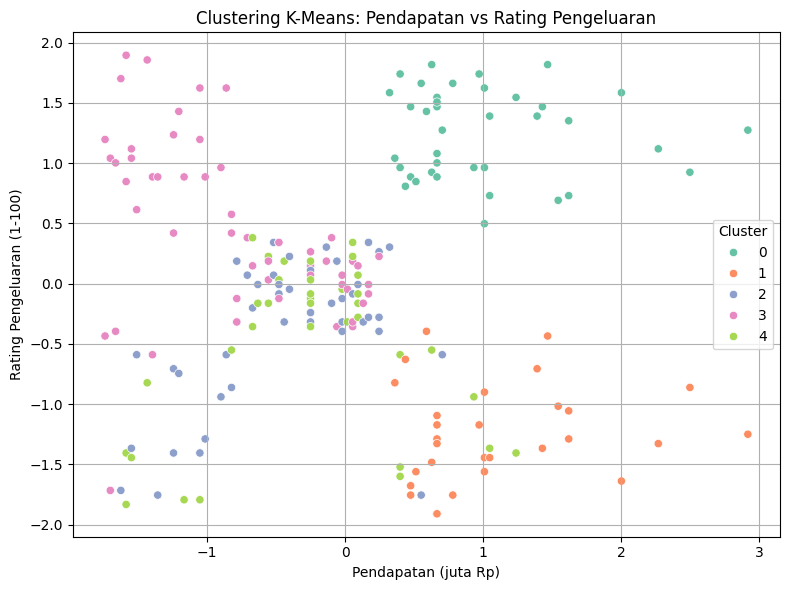

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Misalnya df sudah dibaca dan kolom sudah rapi
data = ['Kelamin', 'Usia', 'Pendapatan_juta_Rp_', 'Rating_pengeluaran_1_100_']

# Normalisasi
scaler = StandardScaler()
df[data] = scaler.fit_transform(df[data])

# KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(df[data])

# Visualisasi hasil cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='Pendapatan_juta_Rp_',
    y='Rating_pengeluaran_1_100_',
    hue='cluster',  # <- ini sudah diperbaiki
    palette='Set2'
)
plt.title('Clustering K-Means: Pendapatan vs Rating Pengeluaran')
plt.xlabel('Pendapatan (juta Rp)')
plt.ylabel('Rating Pengeluaran (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()
